#**Title: Online payment fraud detection using LogisticRegression, XGBClassifier, SVC, RandomForestClassifier algorithms.**

**Objective:** Fraud detection of online payment systems using various ML algorithms.

#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Dataset

In [ ]:
data = pd.read_csv('/content/onlinefraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


To print the information of the data we can use data.info() command.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  56202 non-null  float64
 8   newbalanceDest  56202 non-null  float64
 9   isFraud         56202 non-null  float64
 10  isFlaggedFraud  56202 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.7+ MB


To print the sum of null value the data we can use data.isnull() command.

In [ ]:
data.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

#Missing value handaling

In [ ]:
meanVal=data['amount'].mean()
meanVal=data['oldbalanceOrg'].mean()
meanVal=data['newbalanceOrig'].mean()
meanVal=data['oldbalanceDest'].mean()
meanVal=data['newbalanceDest'].mean()
meanVal=data['isFraud'].mean()
meanVal=data['isFlaggedFraud'].mean()

data['amount'].fillna(value=meanVal, inplace=True)
data['oldbalanceOrg'].fillna(value=meanVal, inplace=True)
data['newbalanceOrig'].fillna(value=meanVal, inplace=True)
data['oldbalanceDest'].fillna(value=meanVal, inplace=True)
data['newbalanceDest'].fillna(value=meanVal, inplace=True)
data['isFraud'].fillna(value=meanVal, inplace=True)
data['isFlaggedFraud'].fillna(value=meanVal, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  int64  
 2   amount          56203 non-null  float64
 3   nameOrig        56203 non-null  int64  
 4   oldbalanceOrg   56203 non-null  float64
 5   newbalanceOrig  56203 non-null  float64
 6   nameDest        56203 non-null  int64  
 7   oldbalanceDest  56203 non-null  float64
 8   newbalanceDest  56203 non-null  float64
 9   isFraud         56203 non-null  float64
 10  isFlaggedFraud  56203 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.7 MB


Let’s see the mean, count , minimum and maximum values of the data

In [ ]:
data.describe()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,56203.000000,56203.000000,5.620300e+04,56203.000000,5.620300e+04,5.620300e+04,56203.000000,5.620300e+04,5.620300e+04,56203.000000,56203.0
mean,7.624451,2.497696,1.598924e+05,28101.000000,7.322596e+05,7.464634e+05,10684.685568,8.391597e+05,1.169814e+06,0.001779,0.0
std,1.999414,1.826066,3.293721e+05,16224.552927,2.184679e+06,2.222594e+06,9293.776135,2.407600e+06,2.893494e+06,0.042144,0.0
min,1.000000,0.000000,6.300000e-01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.000000,8.136200e+03,14050.500000,0.000000e+00,0.000000e+00,3304.000000,0.000000e+00,0.000000e+00,0.000000,0.0
50%,8.000000,4.000000,3.623944e+04,28101.000000,1.788300e+04,0.000000e+00,6724.000000,5.111720e+03,2.167320e+03,0.000000,0.0
75%,9.000000,4.000000,1.918379e+05,42151.500000,1.401410e+05,1.534130e+05,17827.500000,4.722472e+05,8.965790e+05,0.000000,0.0
max,9.000000,5.000000,1.000000e+07,56202.000000,2.854724e+07,2.861740e+07,31878.000000,3.017978e+07,3.197699e+07,1.000000,0.0


#Data Visualization

In this section, we will try to understand and compare all columns.
Let’s count the columns with different datatypes like Category, Integer, Float

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", 		len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 0
Integer variables: 4
Float variables: 7


Let’s see the count plot of the Payment type column using Seaborn library

<Axes: xlabel='type', ylabel='count'>

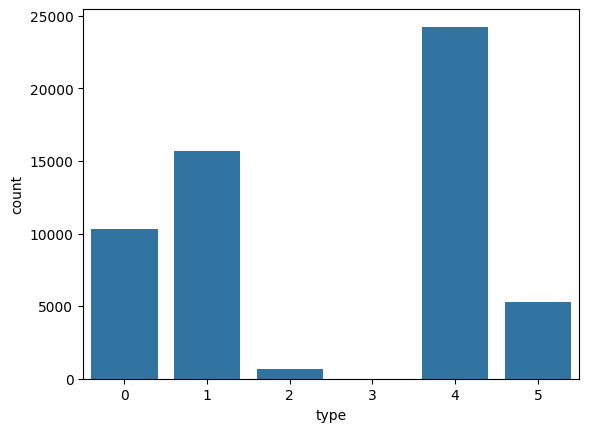

In [ ]:
sns.countplot(x='type', data=data)

We can also use the bar plot for analyzing Type and amount column simultaneously

<Axes: xlabel='type', ylabel='amount'>

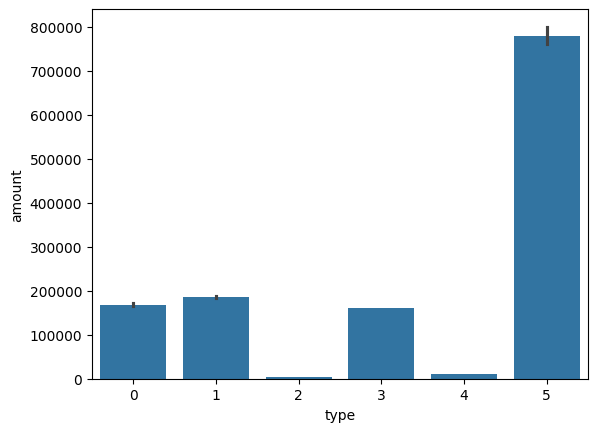

In [ ]:
sns.barplot(x='type', y='amount', data=data)

Both the graph clearly shows that mostly the type cash_out and transfer are maximum in count and as well as in amount.

Let’s check the distribution of data among both the prediction values

In [ ]:
data['isFraud'].value_counts()

isFraud
0.0    56103
1.0      100
Name: count, dtype: int64

The dataset is already in same count. So there is no need of sampling

Now let’s see the distribution of the step column using distplot

<ipython-input-44-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

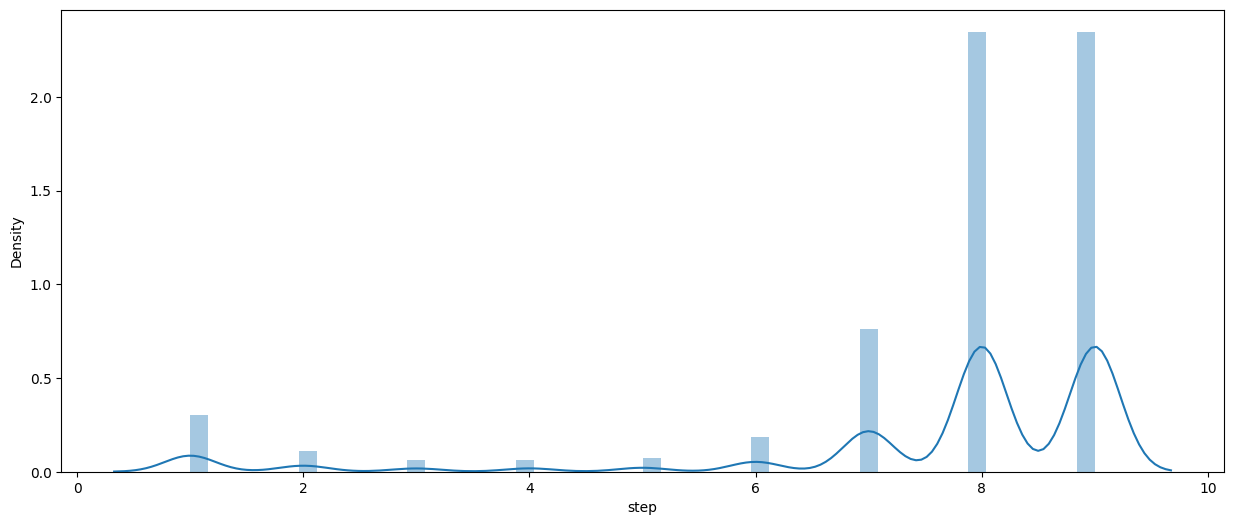

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)

The graph shows the maximum distribution among 200 to 400 of step.

Now, Let’s find the correlation among different features using Heatmap

<Axes: >

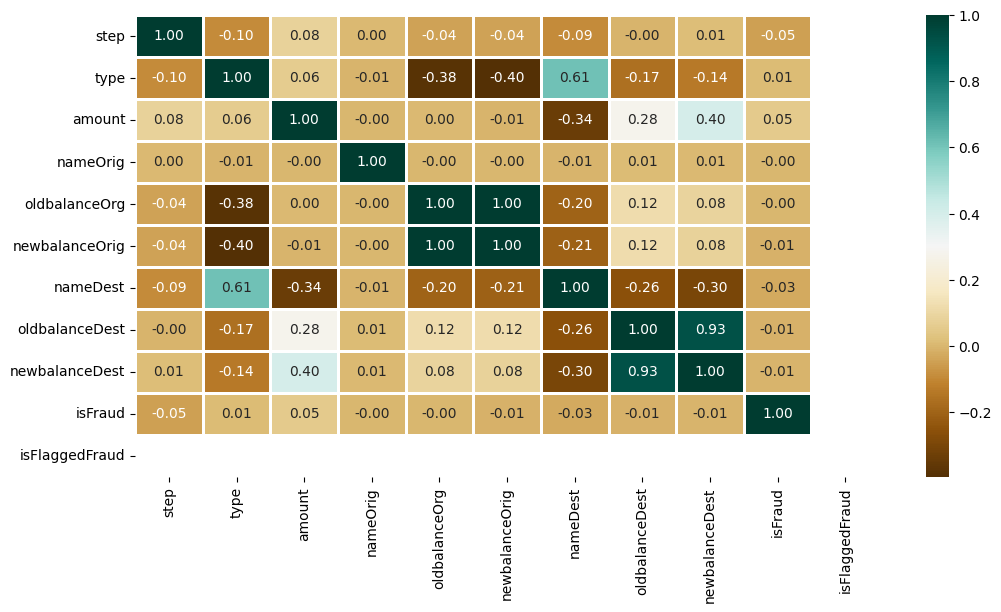

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
    cmap='BrBG',
    fmt='.2f',
    linewidths=2,
    annot=True)


#Data Preprocessing

This step includes the following :

*   Encoding of Type column
*   Dropping irrelevant columns like nameOrig, nameDest
*   Data Splitting

In [ ]:
type_new = pd.get_dummies(data['type'], 	drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMEN,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,False,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,False,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,False,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,True,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,False,False,False,True,False


Once we done with the encoding, now we can drop the irrelevant columns. For that, follow the code given below

In [ ]:
X = data_new.drop(['isFraud', 'type', 	'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

Let’s check the shape of extracted data.

In [ ]:
X.shape, y.shape

((56203, 12), (56203,))

Now let’s split the data into 2 parts : Training and Testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Model Training

As the prediction is a classification problem so the models we will be using are :

**LogisticRegression:**  It predicts that the probability of a given data belongs to the particular category or not.

**XGBClassifier:** It refers to Gradient Boosted decision trees. In this algorithm, decision trees are created in sequential form and weights are assigned to all the independent variables which are then fed into the decision tree which predicts results.

**SVC:** SVC is used to find a hyperplane in an N-dimensional space that distinctly classifies the data points. Then it gives the output according the most nearby element.

**RandomForestClassifier:** Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. Then, it collects the votes from different decision trees to decide the final prediction.


Let’s import the modules of the relevant models

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Once done with the importing, Let’s train the model

In [ ]:
models = [LogisticRegression(), XGBClassifier(),
  SVC(kernel='rbf', probability=True),
  RandomForestClassifier(n_estimators=7,
                         criterion='entropy',
                         random_state=7)]

for i in range(len(models)):
  models[i].fit(X_train, y_train)
  print(f'{models[i]} : ')

train_preds = models[i].predict_proba(X_train)[:, 1]
print('Training Accuracy : ', ras(y_train, train_preds))

y_preds = models[i].predict_proba(X_test)[:, 1]
print('Validation Accuracy : ', ras(y_test, y_preds))
print()

LogisticRegression() : 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
SVC(probability=True) : 
RandomForestClassifier(criterion='entropy', n_estimators=7, random_state=7) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0



We apply LogisticRegression, XGBClassifier, SVC, RandomForestClassifier predicted process. Where training and validation accuracy both of 100%.

#Model Evaluation:

The best-performed model is XGBClassifier. Let’s plot the Confusion Matrix for the same

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[11216     0]
 [    0    25]]
